In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn
%pylab inline

seaborn.set()

Populating the interactive namespace from numpy and matplotlib


In [3]:
import sys
sys.path.append("..")

import cfg

In [4]:
NOISE_LEVELS = cfg.experiment.noise_levels; NOISE_LEVELS

array([0.   , 0.01 , 0.02 , 0.03 , 0.04 , 0.05 , 0.075, 0.1  , 0.125,
       0.15 , 0.175, 0.2  ])

# IMDB

## CharCNN

In [5]:
results = pd.read_csv('../results/CharCNN_IMDB.csv', index_col=0)

In [6]:
results.sample(10)

,acc_test,f1_test,noise_level_test,model_type,noise_level_train,acc_train,f1_train
117,0.59048,0.440302,0.150,CharCNN,0.200,0.893657,0.895028
90,0.67972,0.648338,0.075,CharCNN,0.030,0.886660,0.888379
57,0.59428,0.451285,0.150,CharCNN,0.010,0.879664,0.880886
26,0.73836,0.734720,0.020,CharCNN,0.030,0.886660,0.888379
71,0.56308,0.409791,0.200,CharCNN,0.020,0.889459,0.891632
103,0.63808,0.556384,0.100,CharCNN,0.200,0.893657,0.895028
109,0.74452,0.737582,0.010,CharCNN,0.175,0.877799,0.877456
102,0.65956,0.596922,0.075,CharCNN,0.125,0.879198,0.880259
85,0.74640,0.742235,0.010,CharCNN,0.200,0.893657,0.895028
104,0.61424,0.502630,0.125,CharCNN,0.150,0.876399,0.880469


In [11]:
round(0.02000007, 2)

0.02

In [22]:
results = pd.read_csv('../results/CharCNN_IMDB.csv', index_col=0)
results_same = results[results['noise_level_test'] > 0]
results_orig = results[results['noise_level_test'] == -1]

plot_x = []
plot_y = []

j = 0
for i, noise_level in enumerate(NOISE_LEVELS):
    plot_data = results_same[(results_same.noise_level_train == noise_level) &\
                             (results_same.noise_level_test == noise_level)]
    if not plot_data.empty:
        plot_x.append(round(noise_level, 3))
        plot_y.append([])
        for _, res in plot_data.iterrows():
            plot_y[j].append(res['acc_test'])
        j += 1


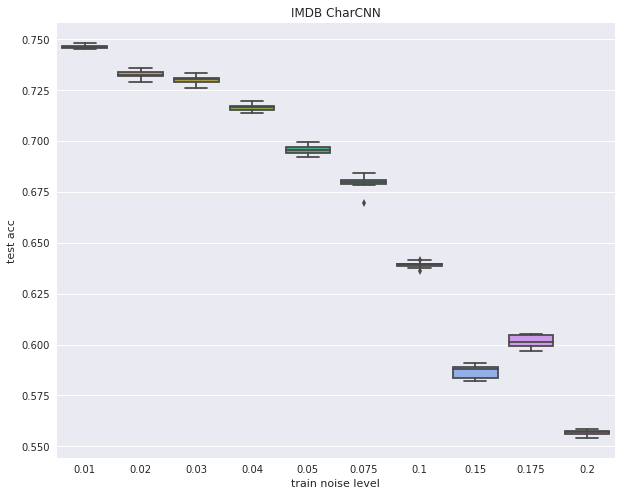

In [23]:
# Проверил tensorboard, все модели сошлись. Нелинейное поведение не из-за недообучения.
plt.figure(figsize=(10, 8))
plt.title('IMDB CharCNN')
plt.xlabel('train noise level')
plt.ylabel('test acc')

seaborn.boxplot(plot_x, plot_y)
plt.savefig('IMDB.png')
plt.show()

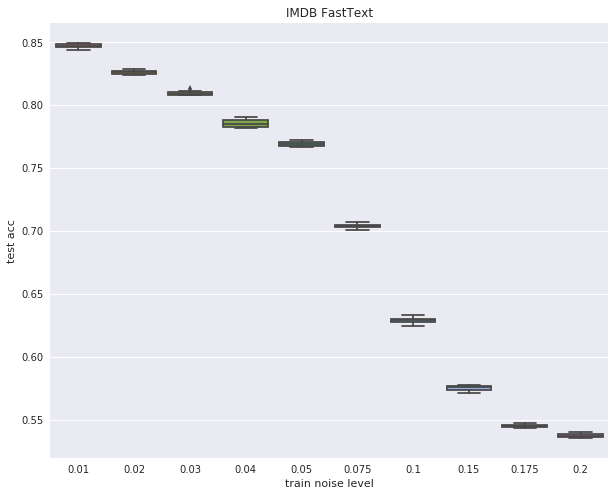

In [21]:
# Проверил tensorboard, все модели сошлись. Нелинейное поведение не из-за недообучения.
results = pd.read_csv('../results/FastText_IMDB.csv', index_col=0)
results_same = results[results['noise_level_test'] > 0]
results_orig = results[results['noise_level_test'] == -1]

plot_x = []
plot_y = []

j = 0
for i, noise_level in enumerate(NOISE_LEVELS):
    plot_data = results_same[(results_same.noise_level_train == noise_level) &\
                             (results_same.noise_level_test == noise_level)]
    if not plot_data.empty:
        plot_x.append(round(noise_level, 3))
        plot_y.append([])
        for _, res in plot_data.iterrows():
            plot_y[j].append(res['acc_test'])
        j += 1

plt.figure(figsize=(10, 8))
plt.title('IMDB FastText')
plt.xlabel('train noise level')
plt.ylabel('test acc')

seaborn.boxplot(plot_x, plot_y)
plt.savefig('IMDB.png')
plt.show()

# Mokoron

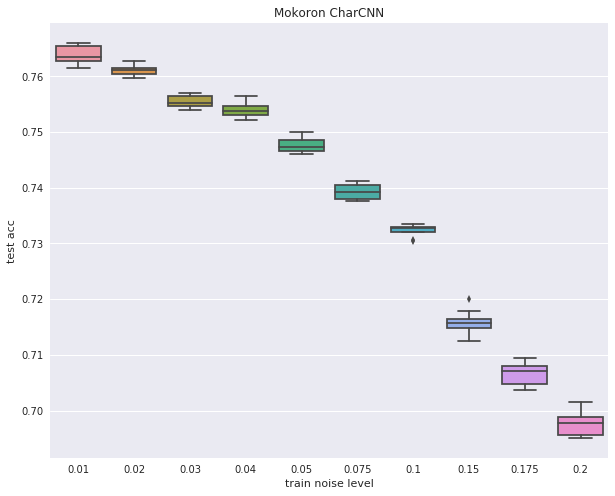

In [20]:
# Acc на валидации сошлась
results = pd.read_csv('../results/CharCNN_mokoron_backup.csv', index_col=0)
results_same = results[results['noise_level_test'] > 0]
results_orig = results[results['noise_level_test'] == -1]

plot_x = []
plot_y = []

j = 0
for i, noise_level in enumerate(NOISE_LEVELS):
    plot_data = results_same[(results_same.noise_level_train == noise_level) &\
                             (results_same.noise_level_test == noise_level)]
    plot_data
    if not plot_data.empty:
        plot_x.append(round(noise_level, 3))
        plot_y.append([])
        for _, res in plot_data.iterrows():
            plot_y[j].append(res['acc_test'])
        j += 1

plt.figure(figsize=(10, 8))
plt.title('Mokoron CharCNN')
plt.xlabel('train noise level')
plt.ylabel('test acc')

seaborn.boxplot(plot_x, plot_y)
plt.savefig('IMDB.png')
plt.show()

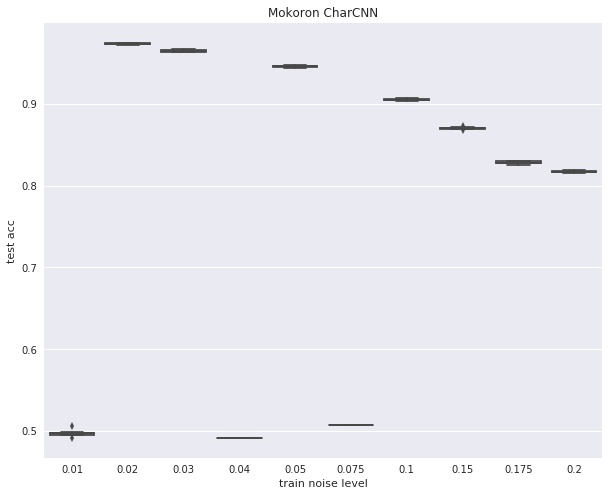

In [19]:
# Ошибка, не убраны скобочки
results = pd.read_csv('../results/FastText_mokoron.csv', index_col=0)
results_same = results[results['noise_level_test'] > 0]
results_orig = results[results['noise_level_test'] == -1]

plot_x = []
plot_y = []

j = 0
for i, noise_level in enumerate(NOISE_LEVELS):
    plot_data = results_same[(results_same.noise_level_train == noise_level) &\
                             (results_same.noise_level_test == noise_level)]
    if not plot_data.empty:
        plot_x.append(round(noise_level, 3))
        plot_y.append([])
        for _, res in plot_data.iterrows():
            plot_y[j].append(res['acc_test'])
        j += 1

plt.figure(figsize=(10, 8))
plt.title('Mokoron Fasttext')
plt.xlabel('train noise level')
plt.ylabel('test acc')

seaborn.boxplot(plot_x, plot_y)
plt.savefig('IMDB.png')
plt.show()